In [1]:
# Import Modules
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from MassProfile import MassProfile
from scipy.optimize import curve_fit

In [2]:
# Create MassProfile objects for MW, M31, and M33
# at snap number 0
MW = MassProfile("MW", 0)
M31 = MassProfile("M31", 0)
M33 = MassProfile("M33", 0)

In [3]:
# Create an array of radii value to use
# start at 0.1 and end at 30.5
r = np.arange(0.1, 30.5, 0.01)

In [4]:
# This function will be to help calculate the 
# best fit Hernquist scale value for the galaxies
def HernquistProfile(radius, a, MHalo):
    """
    Function to calculate the mass enclosed
    at a speicific radius using the
    Hernquist mass profile

    Inputs:
        radius: radius to calculate the mass enclosed
        a:      Hernquist scale
        MHalo:  Total dark matter mass of the galaxy

    Outputs:
        M: Mass enclosed within that radius using a Hernquist Profile
    """
    # Calculate the mass with a Hernquist profile
    M = MHalo*(radius**2)/((a+radius)**2)
    return M

# Mass Profiles

## Milky Way

In [5]:
# Calculate the mass enclosed within the radii above for the MW 
MW_Halo_MassEnclosed = MW.MassEnclosed(1, r)
MW_Disk_MassEnclosed = MW.MassEnclosed(2, r)
MW_Bulge_MassEnclosed = MW.MassEnclosed(3, r)
MW_Total_MassEnclosed = MW.MassEnclosedTotal(r)

In [6]:
# Calculate the total dark matter mass of the MW
MW_DM_Mass = MW.TotalMass(1)

In [7]:
# Wrapper function for the Hernquist profile of the MW
def HernquistMassMW(radii, a):
    # Calculate the Hernquist Profile using the Dark Matter Mass
    # of the Milky Way as MHalo
    return HernquistProfile(radii, a, MHalo=MW_DM_Mass.value)

In [8]:
# Fit the Hernquist profile to the MW Halo Mass Profile
# to determine the best fitting Hernquist scale value
popt_MW, pcov_MW = curve_fit(HernquistMassMW, r, MW_Halo_MassEnclosed.value, p0=[65])

In [9]:
# Store the Milky Way Hernquist scale value
a_MW = popt_MW[0]

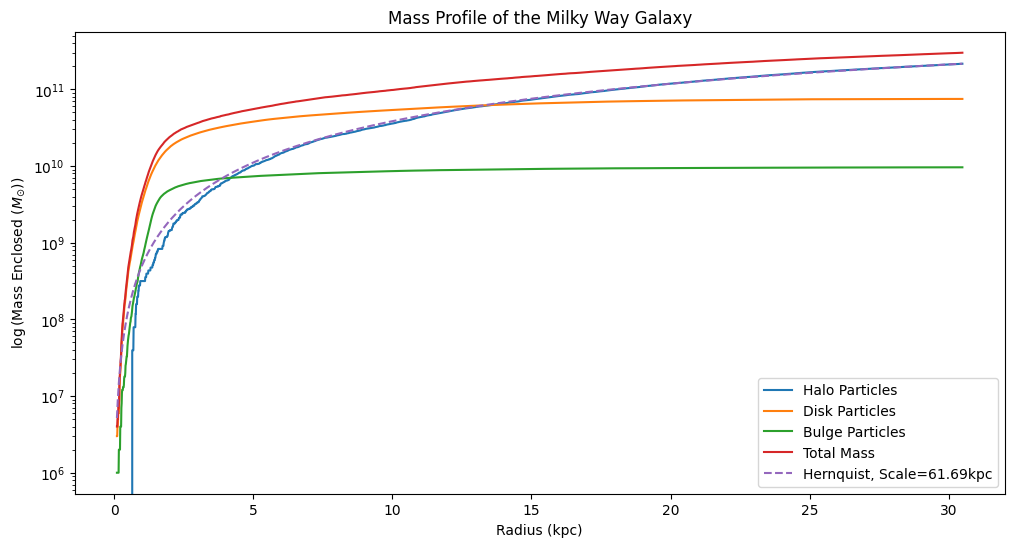

In [10]:
# Plot the Milky Way Mass Profile 
fig, ax = plt.subplots(figsize=(12, 6))
ax.semilogy(r, MW_Halo_MassEnclosed, label="Halo Particles")
ax.semilogy(r, MW_Disk_MassEnclosed, label="Disk Particles")
ax.semilogy(r, MW_Bulge_MassEnclosed, label="Bulge Particles")
ax.semilogy(r, MW_Total_MassEnclosed, label="Total Mass")
ax.semilogy(r, HernquistMassMW(r, a_MW), linestyle="--", label=f"Hernquist, Scale={a_MW:.2f}kpc")
ax.legend()

ax.set_title("Mass Profile of the Milky Way Galaxy")
ax.set_xlabel("Radius (kpc)")
ax.set_ylabel(r"$\log$(Mass Enclosed ($M_{\odot}$))")
plt.show()

## Andromeda M31

In [11]:
# Calculate the mass enclosed within the radii above for M31
M31_Halo_MassEnclosed = M31.MassEnclosed(1, r)
M31_Disk_MassEnclosed = M31.MassEnclosed(2, r)
M31_Bulge_MassEnclosed = M31.MassEnclosed(3, r)
M31_Total_MassEnclosed = M31.MassEnclosedTotal(r)

In [12]:
# Calculate the total dark matter mass of M31
M31_DM_Mass = M31.TotalMass(1)

In [13]:
# Wrapper function for the Hernquist profile of M31
def HernquistMassM31(radii, a):
    # Calculate the Hernquist Profile using the Dark Matter Mass
    # of M31 as MHalo
    return HernquistProfile(radii, a, MHalo=M31_DM_Mass.value)

In [14]:
# Fit the Hernquist profile to the M31 Halo Mass Profile
# to determine the best fitting Hernquist scale value
popt_M31, pcov_M31 = curve_fit(HernquistMassM31, r, M31_Halo_MassEnclosed.value, p0=[65])

In [15]:
# Store the M31 Hernquist scale value
a_M31 = popt_M31[0]

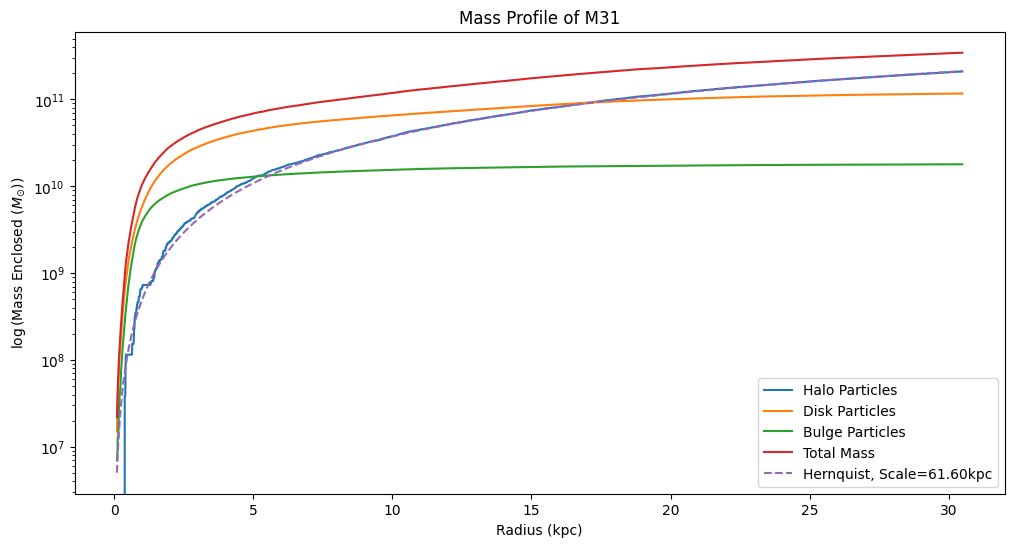

In [16]:
# Plot the M31 Mass Profile 
fig, ax = plt.subplots(figsize=(12,6))
ax.semilogy(r, M31_Halo_MassEnclosed, label="Halo Particles")
ax.semilogy(r, M31_Disk_MassEnclosed, label="Disk Particles")
ax.semilogy(r, M31_Bulge_MassEnclosed, label="Bulge Particles")
ax.semilogy(r, M31_Total_MassEnclosed, label="Total Mass")
ax.semilogy(r, HernquistMassM31(r, a_M31), linestyle='--', label=f"Hernquist, Scale={a_M31:.2f}kpc")
ax.legend()

ax.set_title("Mass Profile of M31")
ax.set_xlabel("Radius (kpc)")
ax.set_ylabel(r"$\log$(Mass Enclosed ($M_{\odot}$))")
plt.show()

## Triangulum M33

In [17]:
# Calculate the mass enclosed within the radii above for M33
M33_Halo_MassEnclosed = M33.MassEnclosed(1, r)
M33_Disk_MassEnclosed = M33.MassEnclosed(2, r)
M33_Total_MassEnclosed = M33.MassEnclosedTotal(r)

In [18]:
# Calculate the total dark matter mass of M33
M33_DM_Mass = M33.TotalMass(1)

In [19]:
# Wrapper function for the Hernquist profile of M33
def HernquistMassM33(radii, a):    
    # Calculate the Hernquist Profile using the Dark Matter Mass
    # of M33 as MHalo
    return HernquistProfile(radii, a, MHalo=M33_DM_Mass.value)

In [20]:
# Fit the Hernquist profile to the M33 Halo Mass Profile
# to determine the best fitting Hernquist scale value
popt_M33, pcov_M33 = curve_fit(HernquistMassM33, r, M33_Halo_MassEnclosed.value, p0=[25])

In [21]:
# Store the M33 Hernquist scale value
a_M33 = popt_M33[0]

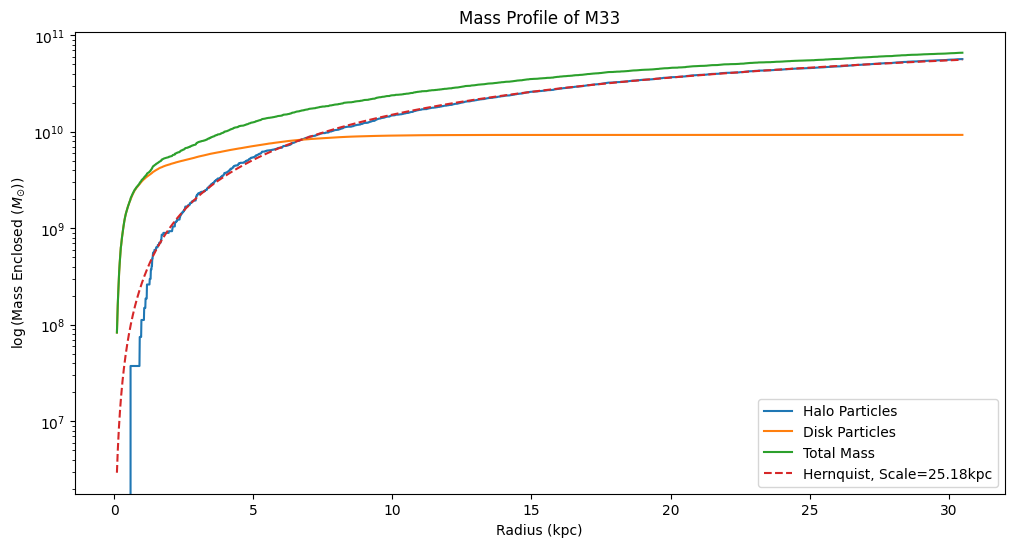

In [22]:
# Plot the M33 Mass Profile 
fig, ax = plt.subplots(figsize=(12,6))
ax.semilogy(r, M33_Halo_MassEnclosed, label="Halo Particles")
ax.semilogy(r, M33_Disk_MassEnclosed, label="Disk Particles")
ax.semilogy(r, M33_Total_MassEnclosed, label="Total Mass")
ax.semilogy(r, HernquistMassM33(r, a_M33), linestyle="--", label=f"Hernquist, Scale={a_M33:.2f}kpc")
ax.legend()

ax.set_title("Mass Profile of M33")
ax.set_xlabel("Radius (kpc)")
ax.set_ylabel(r"$\log$(Mass Enclosed ($M_{\odot}$))")
plt.show()

# Rotation Curves

## Milky Way

In [23]:
# Calculate the Rotation Curve of the MW Components and Total
MW_Halo_V = MW.CircularVelocity(1, r)
MW_Disk_V = MW.CircularVelocity(2, r)
MW_Bulge_V = MW.CircularVelocity(3, r)
MW_Total_V = MW.CircularVelocityTotal(r)

In [24]:
# Calculate the Rotation Curve of the MW using a Hernquist Mass Profile
MW_Hernquist_V = MW.HernquistVCirc(r, a_MW, MW_DM_Mass)

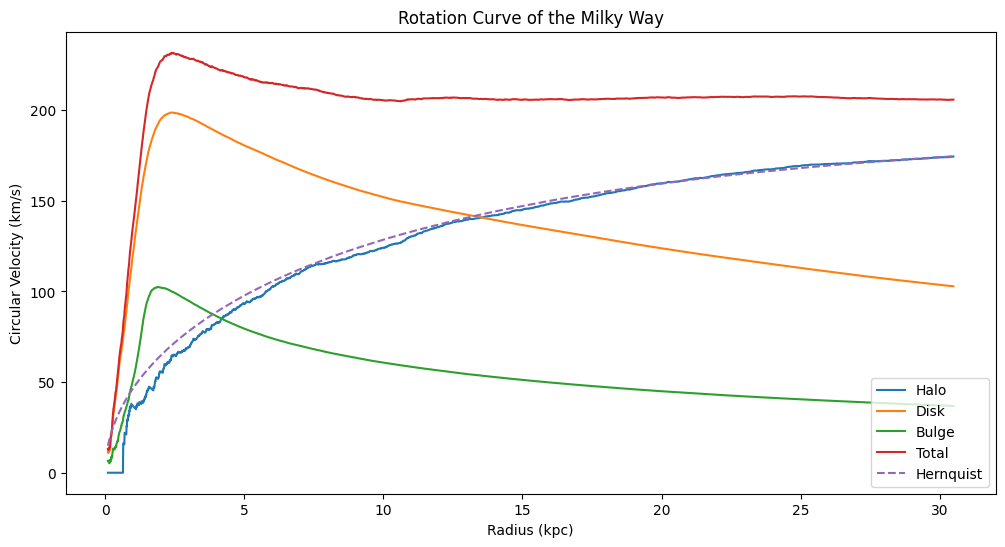

In [25]:
# Plot the Rotation Curve of the MW
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(r, MW_Halo_V, label="Halo")
ax.plot(r, MW_Disk_V, label="Disk")
ax.plot(r, MW_Bulge_V, label="Bulge")
ax.plot(r, MW_Total_V, label="Total")
ax.plot(r, MW_Hernquist_V, linestyle="--", label="Hernquist")
ax.legend(loc='lower right')

ax.set_title("Rotation Curve of the Milky Way")
ax.set_xlabel("Radius (kpc)")
ax.set_ylabel("Circular Velocity (km/s)")
plt.show()

## Andromeda M31

In [26]:
# Calculate the Rotation Curves of the M31 Components and Total
M31_Halo_V = M31.CircularVelocity(1, r)
M31_Disk_V = M31.CircularVelocity(2, r)
M31_Bulge_V = M31.CircularVelocity(3, r)
M31_Total_V = M31.CircularVelocityTotal(r)

In [27]:
# Calculate the Rotation Curve of M31 using a Hernquist Mass Profile
M31_Hernquist_V = M31.HernquistVCirc(r, a_M31, M31_DM_Mass)

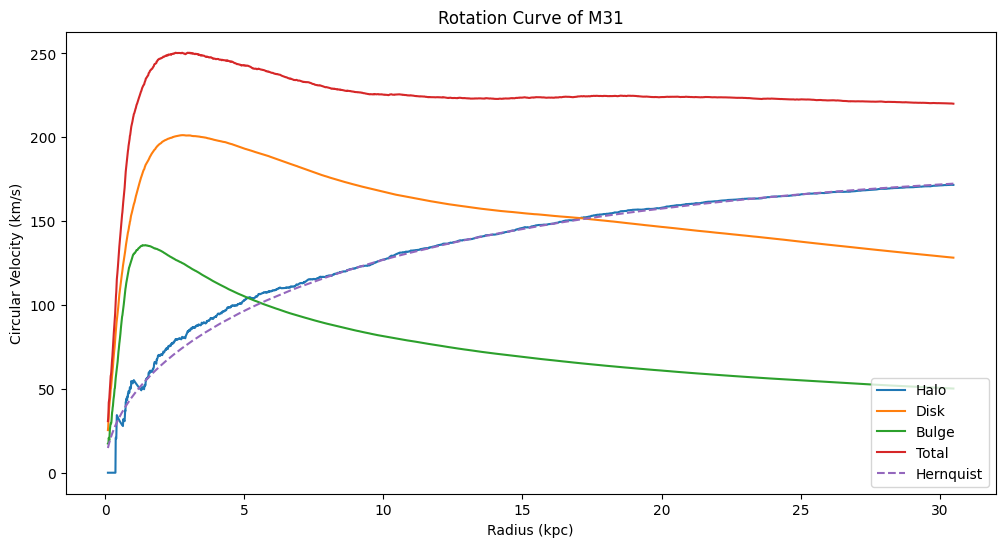

In [34]:
# Plot the Rotation Curve of M31
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(r, M31_Halo_V, label="Halo")
ax.plot(r, M31_Disk_V, label="Disk")
ax.plot(r, M31_Bulge_V, label="Bulge")
ax.plot(r, M31_Total_V, label="Total")
ax.plot(r, M31_Hernquist_V, linestyle="--", label="Hernquist")
ax.legend(loc='lower right')

ax.set_title("Rotation Curve of M31")
ax.set_xlabel("Radius (kpc)")
ax.set_ylabel("Circular Velocity (km/s)")
plt.savefig(r"C:\Users\colto\OneDrive\Desktop\ASTR400B\ResearchAssignment\ResearchAssignment2\HW5_RotationCurve_M31.png")
plt.show()

## Triangulum M33

In [29]:
# Calculate the Rotation Curves of M33 Components and Total
M33_Halo_V = M33.CircularVelocity(1, r)
M33_Disk_V = M33.CircularVelocity(2, r)
M33_Total_V = M33.CircularVelocityTotal(r)

In [30]:
# Calculate the Rotation Curve of M33 using a Hernquist Mass Profile
M33_Hernquist_V = M33.HernquistVCirc(r, a_M33, M33_DM_Mass)

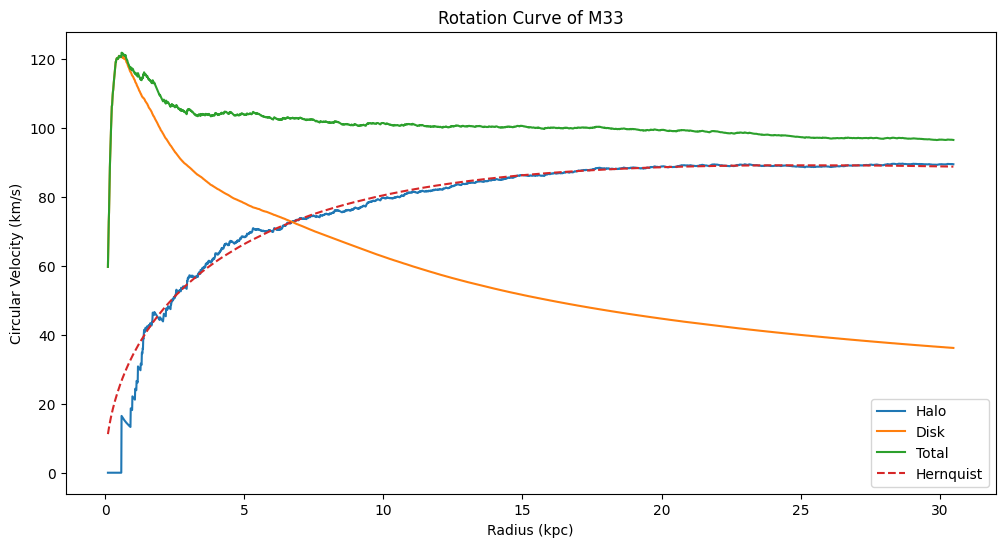

In [31]:
# Plot the Rotation Curve of M33
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(r, M33_Halo_V, label="Halo")
ax.plot(r, M33_Disk_V, label="Disk")
ax.plot(r, M33_Total_V, label="Total")
ax.plot(r, M33_Hernquist_V, linestyle="--", label="Hernquist")
ax.legend(loc='lower right')

ax.set_title("Rotation Curve of M33")
ax.set_xlabel("Radius (kpc)")
ax.set_ylabel("Circular Velocity (km/s)")
plt.show()